In [1]:
# 导入需要的包
import pandas as pd
from snownlp import SnowNLP
from matplotlib import pyplot as plt

In [2]:
# 加载训练好的模型(或者替换模型也可以，此方法比较方便)
from snownlp import sentiment
sentiment.classifier.load('./new.marshal')

In [3]:
# 载入采集的所有评论数据
df = pd.read_csv("comment.csv")
# 删除不需要的列
df = df.drop(["Unnamed: 0"], axis=1)
# 删除有缺失值的行
df = df.dropna(how="any")
# 查看数据
df.head(5)

,content
0,喜欢那个打黑拳！！
1,还可以吧。
2,其实已经一口气狂看到了第七卷。前半的节奏还是意气风发无往不利，越到后面那种命运悲剧的感受越强...
3,2020年头的几天假期啥事没干，就看这几百万字了。真的要戒掉看书一定要看完的坏毛病。及时止损。
4,适合消遣看看，破梗废话太多……


In [4]:
# 验证人工标注的100条数据在新模型分析下的情感倾向
preds = []  # 用于存放每一条情感分析的结果
for i in df["content"]:  # 循环每一条评论
    s = SnowNLP(i)  # 情感分析
    if s.sentiments >= 0.5:
        preds.append(1)
    else:
        preds.append(0)

# 将分析结果合并到原始数据中
df["pred"] = preds
df.head()

,content,pred
0,喜欢那个打黑拳！！,1
1,还可以吧。,1
2,其实已经一口气狂看到了第七卷。前半的节奏还是意气风发无往不利，越到后面那种命运悲剧的感受越强...,1
3,2020年头的几天假期啥事没干，就看这几百万字了。真的要戒掉看书一定要看完的坏毛病。及时止损。,0
4,适合消遣看看，破梗废话太多……,0


In [5]:
# 查看情感倾向分布
sen_class = df.groupby("pred")["pred"].count()
sen_class

pred
0    1629
1    1474
Name: pred, dtype: int64

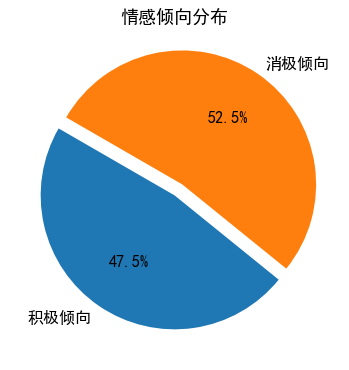

In [6]:
# 可视化 情感倾向分布
labels = ['积极倾向','消极倾向']  # 标签
sizes = [1474, 1629]  # 数量分布
explode = [0, 0.1]  # 样式
plt.figure(figsize=(6,9))  # 图大小
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%',shadow=False,startangle=150,textprops={'fontsize': 16})

plt.title("情感倾向分布", fontsize=18)  # 标题
plt.show()  